# Convolutional Neural Network with Keras

Link: https://medium.com/@cdabakoglu/what-is-convolutional-neural-network-cnn-with-keras-cab447ad204c

## About Dataset

Now we’ll try to use this algorithm with a dataset contains images of 10 different classes of clothing. Dataset consists a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
* The training and test data sets have 785 columns. The first column consists of the class labels, and represents class of clothing. The rest of the columns contain the pixel-values of the associated image.

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

## Import Librariese and Read Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Train Data
dfTrain = pd.read_csv("dataframes/fashion-mnist/fashion-mnist_train.csv")
print("Shape of Train Data: " + str(dfTrain.shape))

Shape of Train Data: (60000, 785)


In [2]:
# First 5 rows of train data
dfTrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Reading Test Data
dfTest = pd.read_csv("dataframes/fashion-mnist/fashion-mnist_test.csv")
print("Shape of Test Data: " + str(dfTest.shape))

Shape of Test Data: (10000, 785)


In [4]:
# First 5 rows of test data
dfTest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


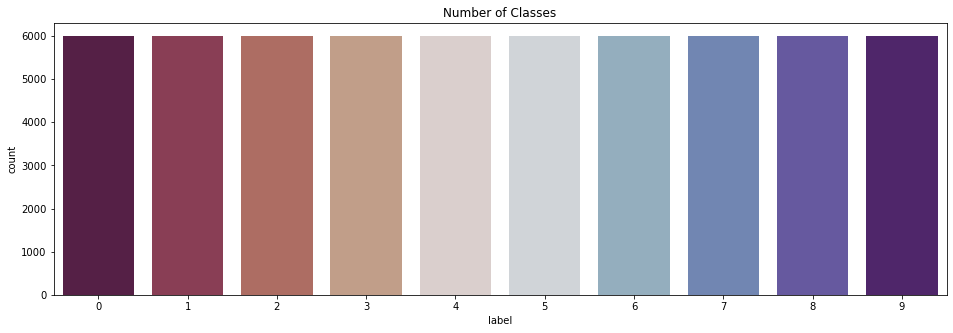

In [5]:
Y_train = dfTrain.label
X_train = dfTrain.drop("label", axis=1)
X_test = dfTest.drop("label", axis=1)
Y_test = dfTest.label

plt.figure(figsize=(16, 5))
sns.countplot(Y_train, palette="twilight_shifted_r")
plt.title("Number of Classes")
plt.show()

## Example Images from Dataset

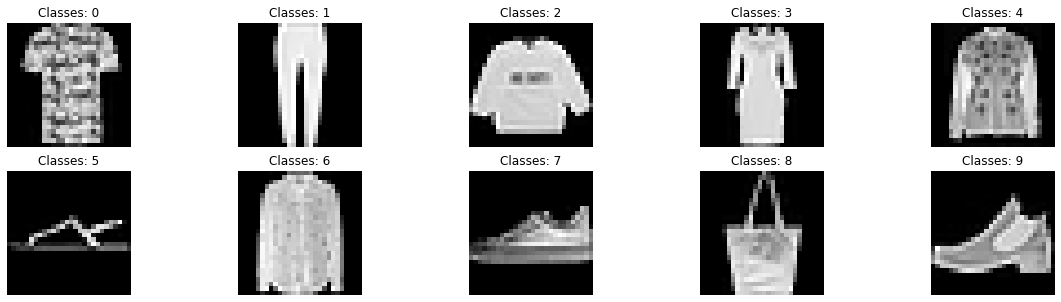

In [6]:
plt.figure(figsize=(20, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = dfTrain[dfTrain.label==i].iloc[0, 1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Classes: " + str(i))
    plt.axis('off')

plt.show()

## Normalization
We'll use normalization to reduce effect of illumination's differences. Also it contributes to works CNN faster.

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Reshape
Our images are 28x28 but to using Keras they have to be 3D matrices. That’s why we reshape them as 28x28x1, we’ll use 1 channel because our images are gray scaled. (e.g. grayscale images has only one channel, RGB image has three channels)

In [8]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)


## Label Encoding
We turn our classes into one-hot encoding label.

In [9]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)

## Train-Test Split

We’ll split our train data. 30% of data will be validation data and 70% of data will be train data.

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train,
                                test_size = 0.3, random_state = 42)

print("x_train shape", x_train.shape)
print("x_test shape", x_val.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_val.shape)

x_train shape (42000, 28, 28, 1)
x_test shape (18000, 28, 28, 1)
y_train shape (42000, 10)
y_test shape (18000, 10)


## Implementing Convolutional Neural Network Algorithm with Keras

 ### Create Model

In [11]:
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import itertools

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same',
                 activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

## Optimizer

We’ll use ‘Adam Optimizer’. Adam is an optimization algorithm that can used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. It is different to classical stochastic gradient descent. SGD pursues a single learning rate for all weights updates and learning rate(alpha) doesn’t change during training process. However in adam optimizer we can say adam optimizer updates leraning rate dynamically.

In [12]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,
              decay=0.0, amsgrad=False)

## Compile Model

Since we have 10 classes we’ll use categorical crossentropy.

In [13]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

## Epoch and Batch Size

Epoch is the number of times the algorithm sees the entire data set. If one epoch is too big to run to the computer at once we divide it smaller parts and number of this parts is called batch.

In [15]:
epochs = 5
batchSize = 30

## Data Augmentation

By using “data augmentation” we can create new data with different orientations. It prevents overfitting.

In [16]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0 
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,   # divide each input by its std
    zca_whitening=False,    # dimension reduction
    rotation_range=0.1,     # randomly rotate images in the range
    zoom_range = 0.1,       # randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally
    height_shift_range=0.1, # randomly shift images vertically
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)    # randomly flip images

datagen.fit(x_train)

## Train or Fit The Model

In [17]:
cnn = model.fit_generator(datagen.flow(x_train, y_train,
    batch_size=batchSize), epochs=epochs, validation_data=(x_val, y_val),
    steps_per_epoch=x_train.shape[0] // batchSize)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1400/1400 [==============================] - 87s 62ms/step - loss: 0.7641 - accuracy: 0.7046 - val_loss: 0.5052 - val_accuracy: 0.7933
Epoch 2/5
1400/1400 [==============================] - 90s 65ms/step - loss: 0.5381 - accuracy: 0.7934 - val_loss: 0.3999 - val_accuracy: 0.8417
Epoch 3/5
1400/1400 [==============================] - 88s 63ms/step - loss: 0.4776 - accuracy: 0.8178 - val_loss: 0.3661 - val_accuracy: 0.8640
Epoch 4/5
1400/1400 [==============================] - 88s 63ms/step - loss: 0.4453 - accuracy: 0.8304 - val_loss: 0.3822 - val_accuracy: 0.8540
Epoch 5/5
1400/1400 [==============================] - 88s 63ms/step - loss: 0.4173 - accuracy: 0.8421 - val_loss: 0.3226 - val_accuracy: 0.8782


## Evaluate The Model

In [18]:
print("Accuracy after fitting: {:.2f}%".format(cnn.history['accuracy'][-1]*100))

Accuracy after fitting: 84.21%


For better accuracy we can increase number of epochs or we can change parameters on layers or we can add additional layer to the model.For the moment I won’t do that because fitting process takes a lot of time.

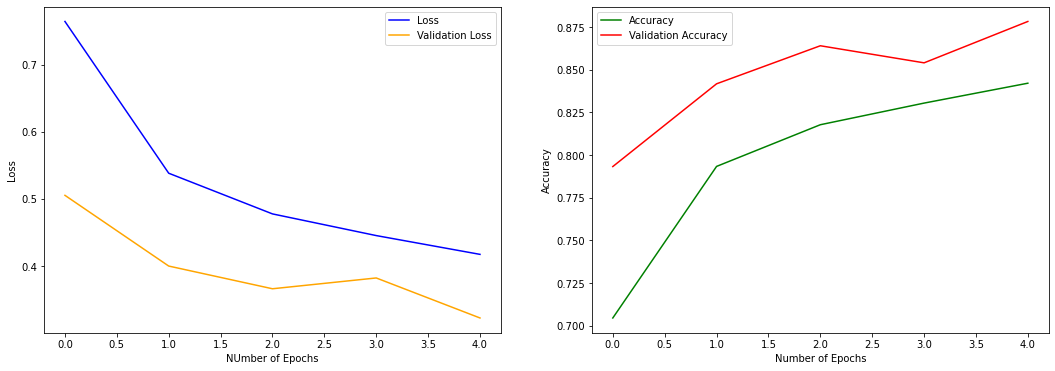

In [19]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
plt.plot(cnn.history['loss'], color="blue", label="Loss")
plt.plot(cnn.history['val_loss'], color="orange", label="Validation Loss")
plt.ylabel("Loss")
plt.xlabel("NUmber of Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn.history['accuracy'], color="green", label="Accuracy")
plt.plot(cnn.history['val_accuracy'], color="red", label="Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()

plt.show()

## Save and load model

In [20]:
import os

model_name = 'mnist_dress_clf.h5'
model.save(model_name)
print('model saved to', os.getcwd())
!ls -ltr

model saved to /home/nsl20/Desktop/Aminul(me)/Deep-Learning-Guide/DL-Intro/dress-classification
total 5560
drwxrwxr-x 3 nsl20 nsl20    4096 Dec 22 09:51 dataframes
-rw-rw-r-- 1 nsl20 nsl20  140948 Dec 22 14:47 dress_classification.ipynb
-rw-rw-r-- 1 nsl20 nsl20 5541968 Dec 22 14:48 mnist_dress_clf.h5


In [21]:
from keras.models import load_model

loaded_model = load_model(model_name)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

Let’s find out score by giving test data we imported before.

In [22]:
Y_test = to_categorical(Y_test, num_classes=10) # One-Hot Encoding

score = model.evaluate(X_test, Y_test)
print("Test Loss: {:.4f}".format(score[0]))
print("Test Accuracy: {:.2f}%".format(score[1]*100))

313/313 [==============================] - 5s 15ms/step - loss: 0.3079 - accuracy: 0.8800
Test Loss: 0.3079
Test Accuracy: 88.00%


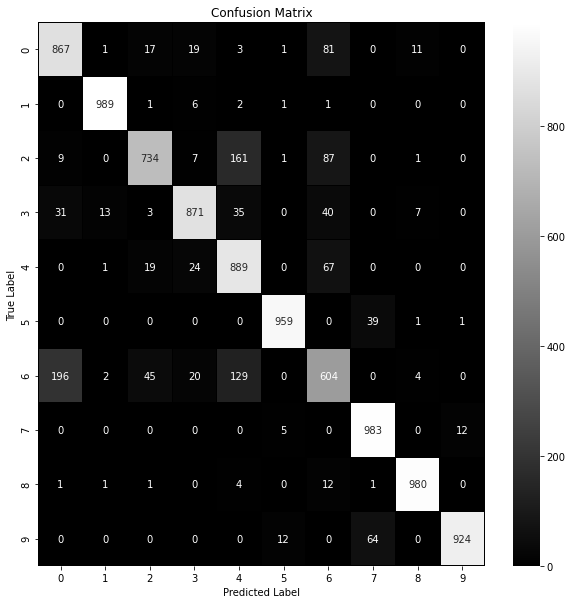

In [51]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
cfm = confusion_matrix(Y_true.tolist(), Y_pred_classes.tolist())

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cfm, annot=True, linewidths=0.1, cmap = 
           "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [52]:
for i in range(len(cfm)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(cfm[i])-cfm[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(cfm[i][i] / 10))
    print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

Class: 0
Number of Wrong Prediction: 133 out of 1000
Percentage of True Prediction: 86.70%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 1
Number of Wrong Prediction: 11 out of 1000
Percentage of True Prediction: 98.90%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 2
Number of Wrong Prediction: 266 out of 1000
Percentage of True Prediction: 73.40%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 3
Number of Wrong Prediction: 129 out of 1000
Percentage of True Prediction: 87.10%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 4
Number of Wrong Prediction: 111 out of 1000
Percentage of True Prediction: 88.90%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 5
Number of Wrong Prediction: 41 out of 1000
Percentage of True Prediction: 95.90%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 6
Number of Wrong Prediction: 396 out of 1000
Percentage of True Prediction: 60.40%
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Class: 7
Number of Wrong Prediction: 17 out of 1000
Percentage of True Prediction: 98.30%
<<<<<<<<<